In [1]:
import matplotlib.pyplot as plt
import mplfinance as mpf
import yfinance as yf

symbol = '2516.T'
#symbol = 'USDJPY=X'
ticker = yf.Ticker(symbol)
df = ticker.history(period='2y', interval='1wk')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2022-10-24 00:00:00+09:00,569.700012,582.299988,562.000000,575.200012,7260770,0.0,0.0,0.0
2022-10-31 00:00:00+09:00,582.599976,583.299988,559.400024,565.400024,4121700,0.0,0.0,0.0
2022-11-07 00:00:00+09:00,566.000000,589.000000,562.000000,587.500000,5996040,0.0,0.0,0.0
2022-11-14 00:00:00+09:00,596.299988,613.200012,590.099976,605.900024,9497670,0.0,0.0,0.0
2022-11-21 00:00:00+09:00,605.400024,620.400024,601.299988,618.500000,4598760,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2024-09-23 00:00:00+09:00,520.400024,529.000000,510.000000,526.700012,3606980,0.0,0.0,0.0
2024-09-30 00:00:00+09:00,507.700012,520.900024,500.500000,504.899994,5484060,0.0,0.0,0.0
2024-10-07 00:00:00+09:00,509.200012,509.899994,496.200012,496.299988,3539380,0.0,0.0,0.0


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/2516.T?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=2516.T&crumb=%7B%22finance%22%3A%7B%22result%22%3Anull%2C%22error%22%3A%7B%22code%22%3A%22Unauthorized%22%2C%22description%22%3A%22Invalid+Cookie%22%7D%7D%7D


KeyError: 'longName'

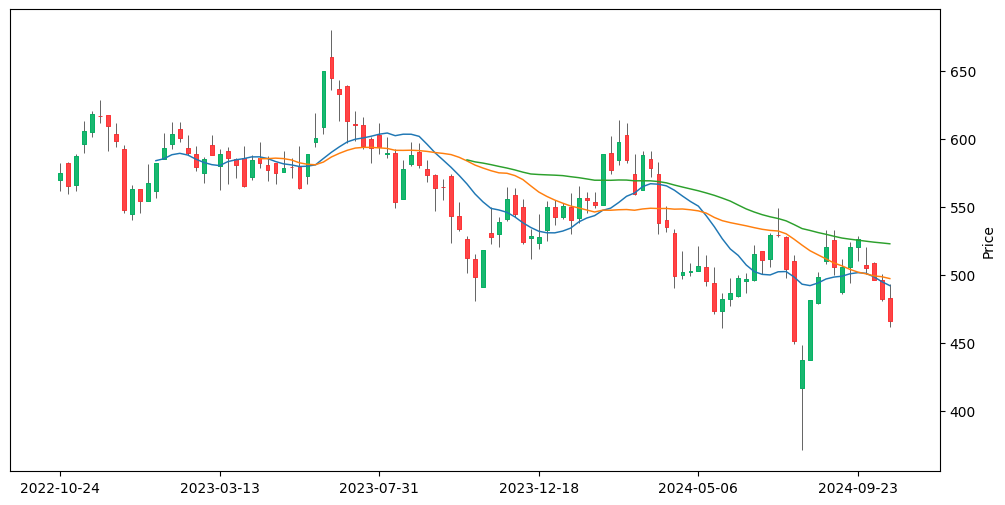

In [2]:
fig = plt.figure(figsize=(12, 6))
#ax = fig.add_axes(111)
ax = fig.add_subplot(111)

mpf.plot(
    df, type='candle', style='yahoo',
    mav=(13, 26, 52),
    volume=False,
    datetime_format='%Y-%m-%d',
    xrotation=0,
    ax=ax,
)
ax.set_title('Weekly chart for %s (%s)\nmav=(13, 26, 52)' %(ticker.info['longName'], symbol))
ax.grid()

plt.tight_layout()
plt.savefig('weekly_chart_n225.png')
plt.show()

In [ ]:
df.tail(2)['Close']

In [3]:
df.tail(2)['Close'].diff()

Date
2024-10-14 00:00:00+09:00     NaN
2024-10-21 00:00:00+09:00   -16.0
Name: Close, dtype: float64

In [5]:
df['Close'].rolling(26).mean()

Date
2022-10-17 00:00:00+09:00           NaN
2022-10-24 00:00:00+09:00           NaN
2022-10-31 00:00:00+09:00           NaN
2022-11-07 00:00:00+09:00           NaN
2022-11-14 00:00:00+09:00           NaN
                                ...    
2024-09-16 00:00:00+09:00    504.196152
2024-09-23 00:00:00+09:00    502.203845
2024-09-30 00:00:00+09:00    500.930767
2024-10-07 00:00:00+09:00    499.442305
2024-10-14 00:00:00+09:00    498.807690
Name: Close, Length: 105, dtype: float64

In [6]:
df['Close'].rolling(52).mean()

Date
2022-10-17 00:00:00+09:00           NaN
2022-10-24 00:00:00+09:00           NaN
2022-10-31 00:00:00+09:00           NaN
2022-11-07 00:00:00+09:00           NaN
2022-11-14 00:00:00+09:00           NaN
                                ...    
2024-09-16 00:00:00+09:00    526.407691
2024-09-23 00:00:00+09:00    525.675000
2024-09-30 00:00:00+09:00    524.936538
2024-10-07 00:00:00+09:00    524.215384
2024-10-14 00:00:00+09:00    523.642308
Name: Close, Length: 105, dtype: float64